Name: Peishan Huang Github Username: peishanhuang USC ID: 7777529178

In [1]:
import os
from sklearn.datasets import load_files
import re
import nltk
import nltk
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import statistics
from matplotlib import pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, Conv1D, MaxPooling1D, LSTM

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/huangpeishan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/huangpeishan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Using TensorFlow backend.


1. Text Classification(b)

In [2]:
X_train=[]
X_test=[]
y_train=[]
y_test=[]
tmp=[]

#load training files
path='../data/neg'
path_list=os.listdir(path)
path_list.sort()
# print(path_list)
for filename in path_list[:700]:
    f=open(os.path.join(path,filename),'rb')
    for text in f:
        tmp.append(text)
    X_train.append(tmp)
    y_train.append(0)
    tmp=[]

path='../data/pos'
path_list=os.listdir(path)
path_list.sort()
#print(path_list)
for filename in path_list[:700]:
    f=open(os.path.join(path,filename),'rb')
    for text in f:
        tmp.append(text)
    X_train.append(tmp)
    y_train.append(1)
    tmp=[]

#load test files   
path='../data/neg'
path_list=os.listdir(path)
path_list.sort()
#print(path_list)
for filename in path_list[700:]:
    f=open(os.path.join(path,filename),'rb')
    for text in f:
        tmp.append(text)
    X_test.append(tmp)
    y_test.append(0)
    tmp=[]    


path='../data/pos'
path_list=os.listdir(path)
path_list.sort()
#print(path_list)
for filename in path_list[700:]:
    f=open(os.path.join(path,filename),'rb')
    for text in f:
        tmp.append(text)
    X_test.append(tmp)
    y_test.append(1)
    tmp=[]  

#print(X_test[0])
print(len(X_test))
print(len(y_test))

600
600


In [3]:
#X_train
documents_train=[] 
stemmer=WordNetLemmatizer()
for file in X_train:
    # Remove all the special characters
    file = re.sub(r'\W', ' ', str(file))
    file = re.sub(r'\d', '', file)
    file = file.replace('___', '')
    file = file.replace('__', '')
    file = file.replace('_', '')
    file = file.strip('__')
    file = file.strip('_')
    file = re.sub(r'\s+[a-zA-Z]\s+', ' ', file)
    file = re.sub(r'\^[a-zA-Z]\s+', ' ', file)
    file = re.sub(r'\s+', ' ', file, flags=re.I)
    file = re.sub(r'^b\s+', '', file)
    file = file.lower()
    file = file.split()
    file = [stemmer.lemmatize(word) for word in file]
    file = ' '.join(file)
    documents_train.append(file)
print(len(documents_train))


1400


In [4]:
#X_test
documents_test=[] 
stemmer=WordNetLemmatizer()
for file in X_test:
    # Remove all the special characters
    file = re.sub(r'\W', ' ', str(file))
    file = re.sub(r'\d', '', file)
    file = file.replace('___', '')
    file = file.replace('__', '')
    file = file.replace('_', '')
    file = file.strip('__')
    file = file.strip('_')
    file = re.sub(r'\s+[a-zA-Z]\s+', ' ', file)
    file = re.sub(r'\^[a-zA-Z]\s+', ' ', file)
    file = re.sub(r'\s+', ' ', file, flags=re.I)
    file = re.sub(r'^b\s+', '', file)
    file = file.lower()
    file = file.split()
    file = [stemmer.lemmatize(word) for word in file]
    file = ' '.join(file)
    documents_test.append(file)
print(len(documents_test))

600


In [5]:
#Count the number of unique words in the whole dataset (train + test) and print it out.
X_train_words=[]
X_train_words_list = []
X_train_words_list_temp = []
whole_words = []
X_test_words = []
X_test_words_list = []
X_test_words_list_temp = []
docu_length=[]
tmp_length=0
temp = ''
count = 0
documents = documents_train + documents_test
for docu in documents_train:
    for word in range(len(docu)):
        count = count + 1
        if docu[word]!= ' ':
            temp = temp + docu[word]
            if count == len(docu):
                count = 0
                X_train_words.append(temp)
                X_train_words_list_temp.append(temp)
                temp = ''
                break
        else:
            X_train_words.append(temp)
            X_train_words_list_temp.append(temp)
            tmp_length = tmp_length + 1
            temp = ''
        
    X_train_words_list.append(X_train_words_list_temp)
    X_train_words_list_temp = []
    docu_length.append(tmp_length)
    tmp_length = 0
print(len(X_train_words))

for docu in documents_test:
    for word in range(len(docu)):
        count = count + 1
        if docu[word]!= ' ':
            temp = temp + docu[word]
            if count == len(docu):
                count = 0
                X_test_words.append(temp)
                X_test_words_list_temp.append(temp)
                temp = ''
                break
        else:
            X_test_words.append(temp)
            X_test_words_list_temp.append(temp)
            tmp_length = tmp_length + 1
            temp = ''
    
    X_test_words_list.append(X_test_words_list_temp)
    X_test_words_list_temp = []
    docu_length.append(tmp_length)
    tmp_length = 0
print(len(X_test_words))
whole_words = X_train_words+X_test_words  

print(len(whole_words))

unique_words = set(whole_words)
#print(unique_words)
print('The number of unique words in the train dataset, ', len(unique_words))


#Calculate the average review length and the standard deviation of review lengths

average_length=(len(whole_words))/(len(documents))
print('The average review length, ', average_length)
standard_deviation=statistics.stdev(docu_length)
print('The standard_deviation of review length, ', standard_deviation)

#print(X_test_words_list[:20])

920586
400616
1321202
The number of unique words in the train dataset,  34546
The average review length,  660.601
The standard_deviation of review length,  290.5695047962858


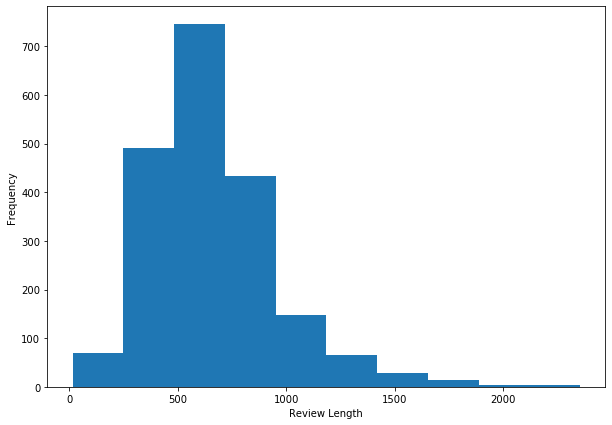

In [6]:
#Plot the histogram of review lengths

fig, ax=plt.subplots(figsize=(10,7))
ax.hist(docu_length)

plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [7]:
#Tokenize each text document using Keras
t=Tokenizer()
t.fit_on_texts(documents)
word_dict={}
sorted_dict={}
new_dict={}
count=1
for i in t.word_counts:
    word_dict[i]=t.word_counts[i]

sorted_keys = sorted(word_dict, key=word_dict.get, reverse=True) 

for w in sorted_keys:
    sorted_dict[w] = word_dict[w]

while sorted_dict: #当sorted_dict不为空
    max_key = max(sorted_dict, key=sorted_dict.get) #get key with max value
    new_dict[max_key]=count
    value=sorted_dict[max_key]
    del sorted_dict[max_key]
    if not sorted_dict:  #当sorted_dict为空
        break  #break跳出整个循环；continue跳过本次循环，开始执行下一次循环
    else:
        new_max = max(sorted_dict, key=sorted_dict.get)
        while sorted_dict[new_max] == value:
            new_dict[new_max]=count
            del sorted_dict[new_max]
            if not sorted_dict:
                break
            new_max = max(sorted_dict, key=sorted_dict.get)
            
    count = count +1       
print(new_dict)   


{'the': 1, 'b': 2, 'and': 3, 'of': 4, 'to': 5, 'is': 6, 'in': 7, 'it': 8, 'that': 9, 'a': 10, 'film': 11, 'with': 12, 'for': 13, 'his': 14, 'this': 15, 'he': 16, 'but': 17, 'on': 18, 'movie': 19, 'are': 20, 'by': 21, 'be': 22, 'one': 23, 'an': 24, 'who': 25, 'not': 26, 'you': 27, 'from': 28, 'at': 29, 'wa': 30, 'have': 31, 'they': 32, 'ha': 33, 'her': 34, 'all': 35, 'character': 36, 'like': 37, 'there': 38, 'so': 39, 'out': 40, 'about': 41, 'up': 42, 'more': 43, 'what': 44, 'when': 45, 'which': 46, 'or': 47, 'she': 48, 'their': 49, 'some': 50, 'time': 51, 'just': 52, 'can': 53, 'get': 54, 'if': 55, 'we': 56, 'scene': 57, 'him': 58, 'make': 58, 'into': 59, 'even': 60, 'only': 61, 'than': 62, 'no': 63, 'good': 64, 'story': 65, 'most': 66, 'will': 67, 'would': 68, 'been': 69, 'much': 69, 'also': 70, 'other': 71, 'well': 72, 'do': 73, 'life': 74, 'two': 75, 'see': 76, 'way': 77, 'them': 78, 'very': 79, 'first': 80, 'after': 81, 'go': 82, 'year': 83, 'because': 84, 'thing': 85, 'off': 86, '

In [8]:
new_X_train_words_list = []
new_X_test_words_list = []
temp_words_list = []
temp = 0
for word_list in X_train_words_list:
    for word in word_list:
        if word in new_dict:
            temp = new_dict[word]
            temp_words_list.append(temp)
    new_X_train_words_list.append(temp_words_list)
    temp_words_list = []
#print(new_X_train_words_list[:2])

for word_list in X_test_words_list:
    for word in word_list:
        if word in new_dict:
            temp = new_dict[word]
            temp_words_list.append(temp)
    new_X_test_words_list.append(temp_words_list)
    temp_words_list = []

print(new_X_test_words_list[:1])


[[1, 602, 6, 675, 583, 11, 9, 53, 61, 611, 33, 250, 623, 520, 662, 2, 154, 640, 181, 4, 15, 75, 233, 11, 237, 12, 115, 458, 584, 675, 44, 33, 69, 174, 42, 7, 1, 666, 347, 2, 8, 220, 86, 670, 10, 11, 41, 24, 560, 103, 645, 115, 581, 7, 596, 630, 2, 17, 101, 7, 1, 283, 347, 1, 574, 4, 1, 11, 664, 376, 3, 8, 261, 65, 41, 123, 648, 18, 24, 664, 537, 648, 9, 667, 578, 4, 500, 673, 2, 640, 181, 331, 1, 574, 376, 221, 43, 3, 8, 261, 668, 151, 377, 4, 596, 4, 1, 582, 97, 24, 645, 604, 6, 620, 97, 49, 565, 643, 676, 658, 247, 4, 670, 29, 35, 623, 2, 21, 1, 51, 8, 99, 27, 53, 61, 658, 171, 277, 3, 392, 44, 15, 11, 30, 90, 586, 5, 22, 41, 2, 1, 319, 36, 4, 1, 602, 6, 656, 662, 516, 648, 630, 2, 16, 560, 5, 1, 673, 4, 676, 97, 137, 654, 671, 633, 49, 672, 384, 661, 657, 3, 670, 651, 180, 674, 534, 55, 27, 131, 271, 13, 64, 51, 2, 516, 364, 99, 231, 1, 136, 9, 16, 33, 94, 5, 15, 201, 84, 16, 6, 594, 12, 14, 74, 3, 202, 9, 23, 77, 5, 676, 214, 6, 5, 273, 82, 4, 1, 493, 3, 5, 609, 59, 140, 4, 1, 615,

In [9]:
#Select a review length L that 70% of the reviews have a length below it.
review_length=sorted(docu_length)
L=int(2000*0.7)
print(review_length[L])

753


In [19]:
#Truncate reviews longer than L words 
truncate_word_list_train=[]
truncate_word_list_test=[]
docu_length=[]
for word_list in new_X_train_words_list:
    if len(word_list) <= review_length[L]:
        truncate_word_list_train.append(word_list)
        docu_length.append(len(word_list))
    else:
        word_list_new=word_list[:review_length[L]]
        truncate_word_list_train.append(word_list_new)
        docu_length.append(len(word_list_new))

for word_list in new_X_test_words_list:
    if len(word_list) <= review_length[L]:
        truncate_word_list_test.append(word_list)
        docu_length.append(len(word_list))
    else:
        word_list_new=word_list[:review_length[L]]
        truncate_word_list_test.append(word_list_new)
        docu_length.append(len(word_list_new))

#print(docu_length)
print(len(docu_length))

2000


In [20]:
# zero-pad reviews shorter than L so that all texts (= data points) are of length L.

pad_train=pad_sequences(truncate_word_list_train)
pad_test=pad_sequences(truncate_word_list_test)

# print(len(pad_train))
# for i in pad_train:
#     print(len(i))
# print(len(pad_test))


In [21]:
#(c) Word Embeddings:  I choose to use all the unique words that appear in this corpus

# define the model
model = Sequential()
embedding_layer = Embedding(input_dim=len(new_dict),output_dim=32,input_length=review_length[L])
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 753, 32)           1105472   
_________________________________________________________________
flatten_5 (Flatten)          (None, 24096)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 24097     
Total params: 1,129,569
Trainable params: 1,129,569
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
#(d) Multi-Layer Perceptron on trainset

# define the model
model = Sequential()
embedding_layer = Embedding(input_dim=len(new_dict),output_dim=32,input_length=review_length[L])
model.add(embedding_layer)
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(np.array(pad_train), np.array(y_train), epochs=2, batch_size = 10)

# summarize the model
print(model.summary())


# evaluate the model
loss, accuracy_train = model.evaluate(np.array(pad_train), np.array(y_train), verbose=0)
print('The accuracy on trainset is,', accuracy_train)

Train on 1400 samples
Epoch 1/2
1400/1400 [==============================] - 5s 3ms/sample - loss: 0.6990 - accuracy: 0.4986
Epoch 2/2
1400/1400 [==============================] - 4s 3ms/sample - loss: 0.6837 - accuracy: 0.5586
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 753, 32)           1105472   
_________________________________________________________________
flatten_6 (Flatten)          (None, 24096)             0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 24096)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 50)                1204850   
_________________________________________________________________
dropout_19 (Dropout)         (None, 50)                0         
________________________

In [23]:
#(d) Multi-Layer Perceptron on testset

# define the model
model = Sequential()
embedding_layer = Embedding(input_dim=len(new_dict),output_dim=32,input_length=review_length[L])
model.add(embedding_layer)
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(np.array(pad_test), np.array(y_test), epochs=2, batch_size = 10)

# summarize the model
print(model.summary())


# evaluate the model
loss, accuracy_test = model.evaluate(np.array(pad_test), np.array(y_test), verbose=0)
print('The accuracy on testset is,', accuracy_test)

Train on 600 samples
Epoch 1/2
600/600 [==============================] - 2s 4ms/sample - loss: 0.6997 - accuracy: 0.5183
Epoch 2/2
600/600 [==============================] - 2s 3ms/sample - loss: 0.6880 - accuracy: 0.5317
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 753, 32)           1105472   
_________________________________________________________________
flatten_7 (Flatten)          (None, 24096)             0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 24096)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 50)                1204850   
_________________________________________________________________
dropout_23 (Dropout)         (None, 50)                0         
_____________________________

In [24]:
#(e) One-Dimensional Convolutional Neural Network on trainset

# define the model
model = Sequential()
embedding_layer = Embedding(input_dim=len(new_dict),output_dim=32,input_length=review_length[L])
model.add(embedding_layer)
model.add(Conv1D(filters=32, kernel_size=3))
model.add(MaxPooling1D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(np.array(pad_train), np.array(y_train), epochs=2, batch_size = 10)

# summarize the model
print(model.summary())


# evaluate the model
loss, accuracy_train = model.evaluate(np.array(pad_train), np.array(y_train), verbose=0)
print('The accuracy on trainset is,', accuracy_train)

Train on 1400 samples
Epoch 1/2
1400/1400 [==============================] - 7s 5ms/sample - loss: 0.7025 - accuracy: 0.4793
Epoch 2/2
1400/1400 [==============================] - 6s 5ms/sample - loss: 0.6993 - accuracy: 0.5107
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 753, 32)           1105472   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 751, 32)           3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 375, 32)           0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 12000)             0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 12000)             0         
________________________

In [25]:
#(e) One-Dimensional Convolutional Neural Network on testset

# define the model
model = Sequential()
embedding_layer = Embedding(input_dim=len(new_dict),output_dim=32,input_length=review_length[L])
model.add(embedding_layer)
model.add(Conv1D(filters=32, kernel_size=3))
model.add(MaxPooling1D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(np.array(pad_test), np.array(y_test), epochs=2, batch_size = 10)

# summarize the model
print(model.summary())


# evaluate the model
loss, accuracy_test = model.evaluate(np.array(pad_test), np.array(y_test), verbose=0)
print('The accuracy on testset is,', accuracy_test)

Train on 600 samples
Epoch 1/2
600/600 [==============================] - 3s 6ms/sample - loss: 0.7100 - accuracy: 0.4750
Epoch 2/2
600/600 [==============================] - 3s 5ms/sample - loss: 0.6908 - accuracy: 0.5650
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 753, 32)           1105472   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 751, 32)           3104      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 375, 32)           0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 12000)             0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 12000)             0         
____________________________

In [26]:
#(f) Long Short-Term Memory Recurrent Neural Network on trainset

# define the model
model = Sequential()
embedding_layer = Embedding(input_dim=len(new_dict),output_dim=32,input_length=review_length[L])
model.add(embedding_layer)
model.add(LSTM(32,dropout=0.2))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(np.array(pad_train), np.array(y_train), epochs=20, batch_size = 10)

# summarize the model
print(model.summary())


# evaluate the model
loss, accuracy_train = model.evaluate(np.array(pad_train), np.array(y_train), verbose=0)
print('The accuracy on trainset is,', accuracy_train)

Train on 1400 samples
Epoch 1/20


2022-07-25 23:23:17.527838: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_standard_lstm_28055_28524' and '__inference___backward_standard_lstm_28055_28524_specialized_for_StatefulPartitionedCall_at___inference_distributed_function_28676' both implement 'lstm_b19899d3-b475-4c8c-8342-97263e10364b' but their signatures do not match.


1400/1400 [==============================] - 97s 69ms/sample - loss: 0.6902 - accuracy: 0.5443
Epoch 2/20
1400/1400 [==============================] - 119s 85ms/sample - loss: 0.5951 - accuracy: 0.6886
Epoch 3/20
1400/1400 [==============================] - 119s 85ms/sample - loss: 0.4856 - accuracy: 0.7700
Epoch 4/20
1400/1400 [==============================] - 113s 81ms/sample - loss: 0.4113 - accuracy: 0.8207
Epoch 5/20
1400/1400 [==============================] - 114s 82ms/sample - loss: 0.3459 - accuracy: 0.8579
Epoch 6/20
1400/1400 [==============================] - 114s 82ms/sample - loss: 0.2946 - accuracy: 0.8757
Epoch 7/20
1400/1400 [==============================] - 148s 105ms/sample - loss: 0.2154 - accuracy: 0.9214
Epoch 8/20
1400/1400 [==============================] - 112s 80ms/sample - loss: 0.1852 - accuracy: 0.9286
Epoch 9/20
1400/1400 [==============================] - 114s 81ms/sample - loss: 0.1944 - accuracy: 0.9243
Epoch 10/20
1400/1400 [=========================

2022-07-26 00:03:58.069414: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_37373' and '__inference_standard_lstm_37373_specialized_for_sequential_11_lstm_1_StatefulPartitionedCall_at___inference_distributed_function_37741' both implement 'lstm_42a62667-60c9-42d0-bc9b-0e7598403b49' but their signatures do not match.


The accuracy on trainset is, 0.9564286


In [27]:
#(f) Long Short-Term Memory Recurrent Neural Network on testset

# define the model
model = Sequential()
embedding_layer = Embedding(input_dim=len(new_dict),output_dim=32,input_length=review_length[L])
model.add(embedding_layer)
model.add(LSTM(32,dropout=0.2))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(np.array(pad_test), np.array(y_test), epochs=20, batch_size = 10)

# summarize the model
print(model.summary())


# evaluate the model
loss, accuracy_test = model.evaluate(np.array(pad_test), np.array(y_test), verbose=0)
print('The accuracy on testset is,', accuracy_test)

Train on 600 samples
Epoch 1/20


2022-07-26 00:16:52.458859: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_cudnn_lstm_with_fallback_40669_40849' and '__inference___backward_standard_lstm_41015_41484_specialized_for_StatefulPartitionedCall_at___inference_distributed_function_41636' both implement 'lstm_ec0666e8-f4d5-49f8-b610-dbfe309b5ef6' but their signatures do not match.


600/600 [==============================] - 43s 72ms/sample - loss: 0.6943 - accuracy: 0.4650
Epoch 2/20
600/600 [==============================] - 39s 65ms/sample - loss: 0.6890 - accuracy: 0.5600
Epoch 3/20
600/600 [==============================] - 39s 65ms/sample - loss: 0.5811 - accuracy: 0.7350
Epoch 4/20
600/600 [==============================] - 40s 66ms/sample - loss: 0.3649 - accuracy: 0.8567
Epoch 5/20
600/600 [==============================] - 40s 66ms/sample - loss: 0.1710 - accuracy: 0.9450
Epoch 6/20
600/600 [==============================] - 39s 64ms/sample - loss: 0.0650 - accuracy: 0.9800
Epoch 7/20
600/600 [==============================] - 39s 66ms/sample - loss: 0.0442 - accuracy: 0.9900
Epoch 8/20
600/600 [==============================] - 40s 67ms/sample - loss: 0.0420 - accuracy: 0.9800
Epoch 9/20
600/600 [==============================] - 39s 65ms/sample - loss: 0.0376 - accuracy: 0.9917
Epoch 10/20
600/600 [==============================] - 40s 66ms/sample - lo

2022-07-26 00:29:58.699712: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_45533' and '__inference_standard_lstm_45533_specialized_for_sequential_12_lstm_2_StatefulPartitionedCall_at___inference_distributed_function_45901' both implement 'lstm_238036da-1018-46d5-a1ad-a9eed3f9110f' but their signatures do not match.


The accuracy on testset is, 0.99833333


Reference:
1.https://stackabuse.com/text-classification-with-python-and-scikit-learn/
2.https://blog.csdn.net/zdz0200/article/details/81453367
3.histogram:https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/
4.判断字典为空https://blog.csdn.net/tsfy2003/article/details/107303873#:~:text=%E5%8F%AF%E9%80%9A%E8%BF%87Dictionary%3CTKey%2CTValue,0%E5%AF%B9%E9%94%AE%E5%80%BC%E5%AF%B9%E3%80%82